# Startup Solution

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [185]:
sp=pd.read_csv("50_Startups.csv")
sp.sample(6)
sp.shape

(50, 5)

In [186]:
sp.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

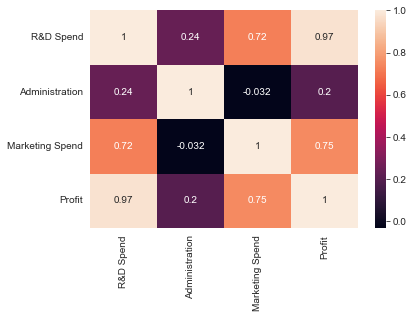

In [187]:
sn.heatmap(sp.corr(),annot=True)

In [190]:
sp.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [191]:
sp=sp.rename(columns={"R&D Spend":"Spend","Marketing Spend":"Marketing_Spend"})

In [192]:
sp.sample(4)

,Spend,Administration,Marketing_Spend,State,Profit
23,67532.53,105751.03,304768.73,Florida,108733.99
0,165349.20,136897.80,471784.10,New York,192261.83
5,131876.90,99814.71,362861.36,New York,156991.12
2,153441.51,101145.55,407934.54,Florida,191050.39


In [ ]:
#Basic Model with given data

In [193]:
model=smf.ols('Profit~Spend+Administration+Marketing_Spend+State',data=sp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        16:12:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Spend                 0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
sp.columns

Index(['Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [196]:
#Calucating VIF
spend_rsq=smf.ols('Spend~Administration+Marketing_Spend',data=sp).fit().rsquared
spend_vif=1/(1-spend_rsq)
adm_rsq=smf.ols('Administration~Spend+Marketing_Spend',data=sp).fit().rsquared
adm_vif=1/(1-adm_rsq)
mark_rsq=smf.ols('Marketing_Spend~Spend+Administration',data=sp).fit().rsquared
mark_vif=1/(1-mark_rsq)
print(spend_rsq,spend_vif,adm_rsq,adm_vif,mark_rsq,mark_vif)

0.5949618224573936 2.4689030699947017 0.14900208239517554 1.1750910070550458 0.5702202685282503 2.3267732905308773


In [197]:
df={'Varibles':['Spend', 'Administration', 'Marketing_Spend'],'VIF':[spend_vif,adm_vif,mark_vif]}
vif_frame=pd.DataFrame(df)
print(vif_frame)

          Varibles       VIF
0            Spend  2.468903
1   Administration  1.175091
2  Marketing_Spend  2.326773


In [198]:
#2nd Assumption

In [199]:
#Error should not be dependent on features, hence all features included in prediction we can calucate error vs prediction

In [131]:
error=model.resid

In [132]:
y_pred=model.predict()

Text(0, 0.5, 'Error')

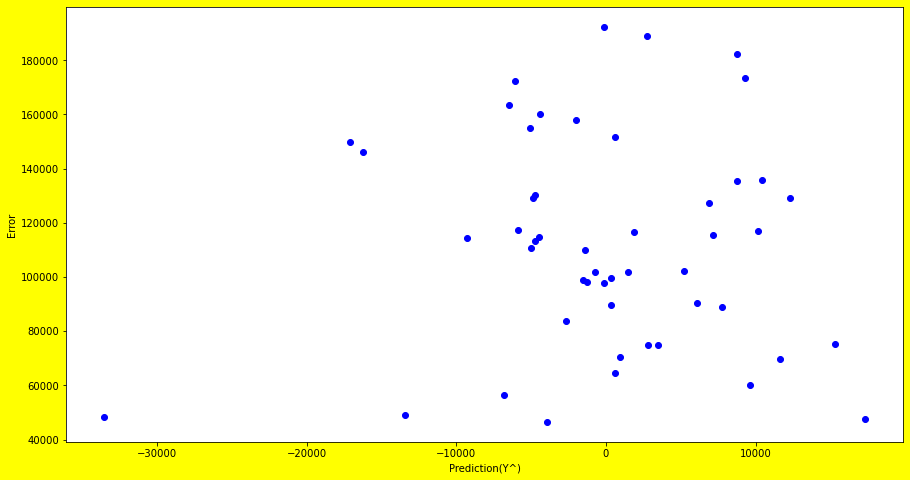

In [133]:
plt.figure(figsize=(15,8),facecolor='yellow',label="50_Startups")
plt.scatter(error,y_pred,color='blue')
plt.xlabel("Prediction(Y^)")
plt.ylabel("Error")
#There is no pattern show(Hence all features are independant)

In [203]:
#3rd Assumption - Test for Normality

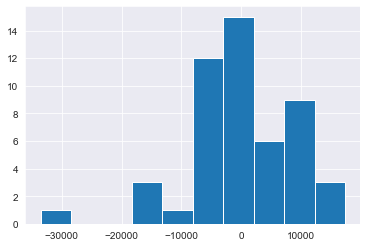

In [205]:
plt.hist(model.resid)
plt.show()

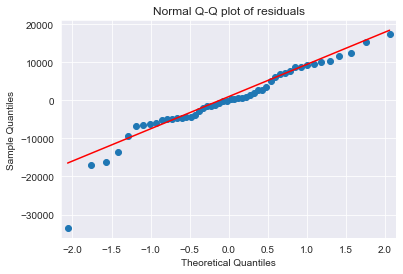

In [216]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [134]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [135]:
K=3
N=50
cooks_dist=3*(K+1)/N
print(cooks_dist)

0.24


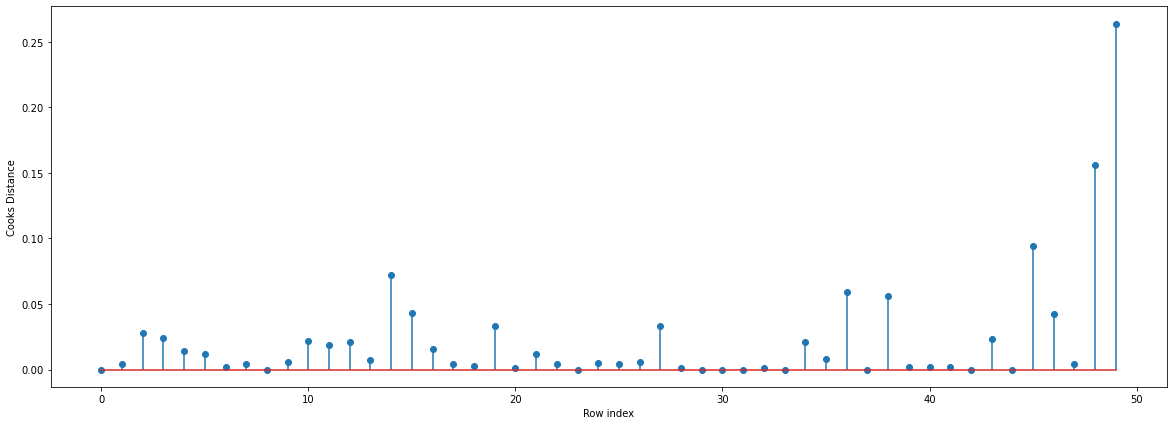

In [136]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(sp)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [137]:
(np.argmax(c),np.max(c))

(49, 0.2639594358692202)

In [138]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [139]:
sp1=sp
sp1.shape

(50, 5)

In [140]:
#Discard the data points which are influencers and reasign the row number (reset_index())
sp1=sp.drop(sp1.index[[49]],axis=0).reset_index()
sp1=sp1.drop(['index'],axis=1)

In [141]:
sp1.tail(5)
sp1.shape

(49, 5)

In [142]:
model1=smf.ols('Profit~Spend+Administration+Marketing_Spend+State',data=sp1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.51e-29
Time:                        17:09:46   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
State[T.Florida]  -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
State[T.New York] -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
Spend                 0.7836      0.039     20.056      0.000       0.705       0.862
Administration       -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing_Spend       0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
#4th Assumption - Homoscadasticiry

In [145]:
def get_standardized_values( val ):
    return (val - val.mean())/val.std()

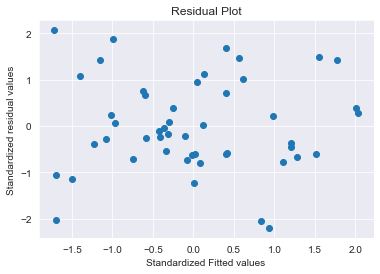

In [231]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Build Model

In [233]:
final_model=smf.ols('Profit~Spend+Administration+Marketing_Spend+State',data=sp1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.51e-29
Time:                        16:30:30   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
State[T.Florida]  -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
State[T.New York] -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
Spend                 0.7836      0.039     20.056      0.000       0.705       0.862
Administration       -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing_Spend       0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#2nd Assignment - Toyota Cars Solution

In [ ]:
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [14]:
tc=pd.read_csv("ToyotaCorolla.csv",encoding='latin')
data=pd.DataFrame()
data['Price']=tc['Price']
data['Age']=tc['Age_08_04']
data['KM']=tc['KM']
data['HP']=tc['HP']
data['CC']=tc['cc']
data['Doors']=tc['Doors']
data['Gears']=tc['Gears']
data['Q_Tax']=tc['Quarterly_Tax']
data['Weight']=tc['Weight']
data.sample(6)

,Price,Age,KM,HP,CC,Doors,Gears,Q_Tax,Weight
389,9450,54,138394,69,1900,4,5,185,1095
1351,5845,70,60600,86,1300,3,5,85,1060
158,19750,17,11999,110,1600,5,5,85,1130
945,10250,62,53285,110,1600,5,5,85,1075
1229,8700,75,83850,110,1600,3,5,85,1055
867,9750,66,63328,86,1300,5,5,85,1065


<AxesSubplot:>

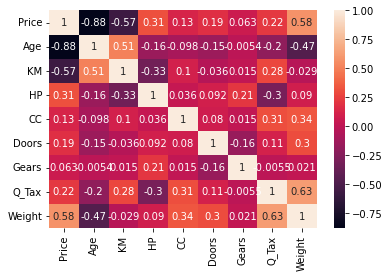

In [17]:
sn.heatmap(data.corr(),annot=True)

In [25]:
basic_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Q_Tax+Weight',data=data).fit()
basic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:34:40   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Q_Tax          3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Q_Tax', 'Weight'], dtype='object')

In [84]:
#1St Assumption Features should be independant
Price_rsq=smf.ols('Age~KM+HP+CC+Doors+Gears+Q_Tax+Weight',data=data).fit().rsquared
Price_vif=1/(1-Price_rsq)
KM_rsq=smf.ols('KM~Age+HP+CC+Doors+Gears+Q_Tax+Weight',data=data).fit().rsquared
KM_vif=1/(1-Price_rsq)
HP_rsq=smf.ols('HP~KM+Age+CC+Doors+Gears+Q_Tax+Weight',data=data).fit().rsquared
HP_vif=1/(1-KM_rsq)
CC_rsq=smf.ols('CC~KM+HP+Age+Doors+Gears+Q_Tax+Weight',data=data).fit().rsquared
CC_vif=1/(1-CC_rsq)
Doors_rsq=smf.ols('Doors~KM+HP+CC+Age+Gears+Q_Tax+Weight',data=data).fit().rsquared
Doors_vif=1/(1-Doors_rsq)
Gears_rsq=smf.ols('Gears~KM+HP+CC+Doors+Age+Q_Tax+Weight',data=data).fit().rsquared
Gears_vif=1/(1-Gears_rsq)
Q_Tax_rsq=smf.ols('Q_Tax~KM+HP+CC+Doors+Gears+Age+Weight',data=data).fit().rsquared
Q_Tax_vif=1/(1-Q_Tax_rsq)
Weight_rsq=smf.ols('Weight~KM+HP+CC+Doors+Gears+Q_Tax+Age',data=data).fit().rsquared
Weight_vif=1/(1-Weight_rsq)
print(Price_vif,KM_vif,HP_vif,CC_vif,Doors_vif,Gears_vif,Q_Tax_vif,Q_Tax_vif,Weight_vif)
#As we cans see above there are no features dependant on each other(Threshold<10)

1.8846198056602868 1.8846198056602868 1.7569047782042881 1.163893984942379 1.1565752070760436 1.0987230193470368 2.311430811531038 2.311430811531038 2.516419837445868


As we see below, there no correlation between features and Error(Hence they are independant)


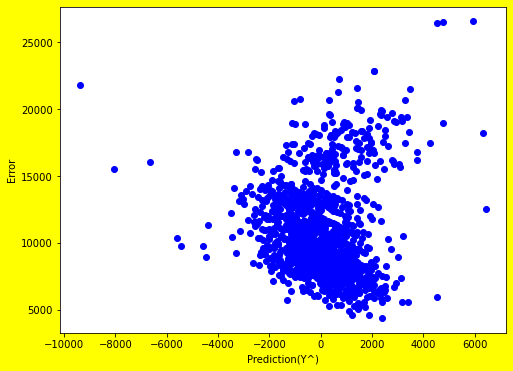

In [46]:
#2nd Assumption
#Error should not be dependent on features, hence all features included in prediction we can calucate error vs prediction
error=basic_model.resid
y_pred=basic_model.predict()
plt.figure(figsize=(8,6),facecolor='yellow',label="Toyoto Cars")
plt.scatter(error,y_pred,color='blue')
plt.xlabel("Prediction(Y^)")
plt.ylabel("Error")
print("As we see below, there no correlation between features and Error(Hence they are independant)")

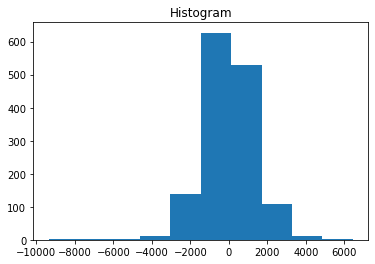

In [61]:
#3Rd Assumption (Error should come form Normal distribution, Mean of that distribution should be zero)
plt.title("Histogram")
plt.hist(basic_model.resid)
plt.show()



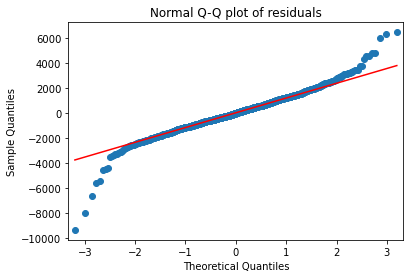

<function matplotlib.pyplot.show(close=None, block=None)>

In [62]:
qqplot=sm.qqplot(basic_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()
plt.show

In [69]:
model_influence = basic_model.get_influence()
(c, _) = model_influence.cooks_distance
K=3
N=1436
cooks_dist=3*(K+1)/N
print(cooks_dist)

0.008356545961002786


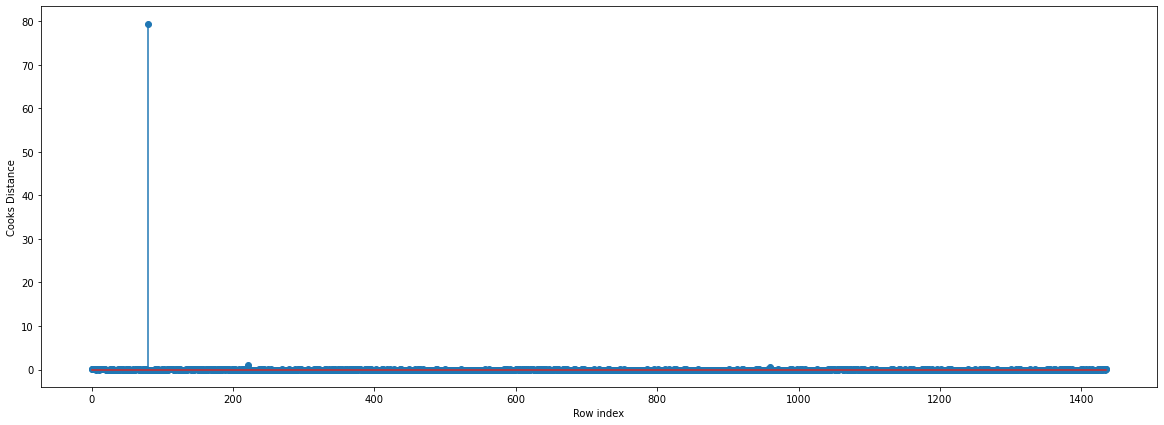

In [67]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

In [70]:
np.where(c>0.008)

(array([  14,   16,   49,   53,   80,   91,  109,  110,  111,  115,  141,
         147,  171,  189,  191,  192,  221,  330,  393,  402,  523,  601,
         654,  913,  960,  991, 1058, 1435], dtype=int64),)

In [82]:
data1=data
data1=data.drop(data1.index[[14,16,49,53,80,91,109,110,111,115,141,147,171,189,191,192,221,330,393,402,523,601,654,913,960,
                             991,1058,1435]],axis=0).reset_index()
data1=data1.drop(['index'],axis=1)
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Q_Tax+Weight',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1437.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:34:36   Log-Likelihood:                -11863.
No. Observations:                1408   AIC:                         2.374e+04
Df Residuals:                    1399   BIC:                         2.379e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.437e+04   1456.280     -9.867      0.000   -1.72e+04   -1.15e+04
Age         -111.0090      2.323    -47.795      0.000    -115.565    -106.453
KM            -0.0171      0.001    -15.437      0.000      -0.019      -0.015
HP            25.9219      2.766      9.370      0.000      20.495      31.349
CC            -3.0894      0.292    -10.593      0.000      -3.661      -2.517
Doors       -118.6290     34.926     -3.397      0.001    -187.141     -50.117
Gears        344.7916    177.672      1.941      0.053      -3.740     693.323
Q_Tax          0.5098      1.345      0.379      0.705      -2.128       3.148
Weight        31.1552      1.356     22.975      0.000      28.495      33.815
==============================================================================
Omnibus:                       13.385   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.005
Skew:                           0.175   Prob(JB):                     0.000552
Kurtosis:                       3.365   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

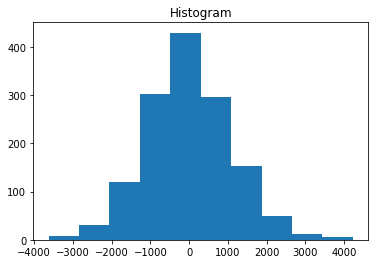

In [75]:
plt.title("Histogram")
plt.hist(model1.resid)
plt.show()

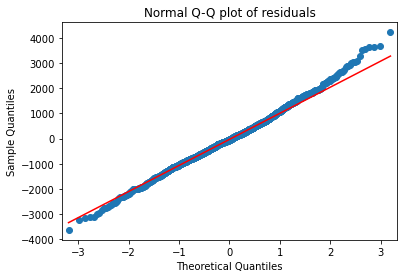

<function matplotlib.pyplot.show(close=None, block=None)>

In [76]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()
plt.show

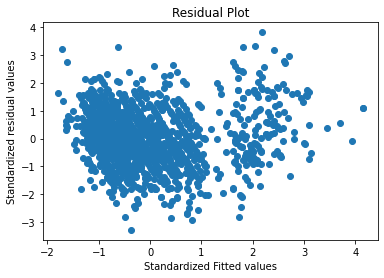

In [77]:
#4th Assumption (Homoscadasticity)
def get_standardized_values( val ):
    return (val - val.mean())/val.std()

plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
#There is no patter is visable from the data(hence there is no Heteroscadasticty)

# Final Model

In [83]:
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Q_Tax+Weight',data=data1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1437.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:37:55   Log-Likelihood:                -11863.
No. Observations:                1408   AIC:                         2.374e+04
Df Residuals:                    1399   BIC:                         2.379e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.437e+04   1456.280     -9.867      0.000   -1.72e+04   -1.15e+04
Age         -111.0090      2.323    -47.795      0.000    -115.565    -106.453
KM            -0.0171      0.001    -15.437      0.000      -0.019      -0.015
HP            25.9219      2.766      9.370      0.000      20.495      31.349
CC            -3.0894      0.292    -10.593      0.000      -3.661      -2.517
Doors       -118.6290     34.926     -3.397      0.001    -187.141     -50.117
Gears        344.7916    177.672      1.941      0.053      -3.740     693.323
Q_Tax          0.5098      1.345      0.379      0.705      -2.128       3.148
Weight        31.1552      1.356     22.975      0.000      28.495      33.815
==============================================================================
Omnibus:                       13.385   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.005
Skew:                           0.175   Prob(JB):                     0.000552
Kurtosis:                       3.365   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""